In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, pairwise
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pylab as plt
from datetime import datetime, date
import datetime as dt
from prettytable import PrettyTable

import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import classificationSummary, gainsChart, liftChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba.metric import AIC_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates

%matplotlib inline


## Pre-Processing

In [4]:
# Load the Superstore dataset
data=pd.read_csv('superstore_data.csv')
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
# Dataset row/columns
data.shape

(2240, 22)

In [6]:
# Dataset columns 
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [7]:
# Find missing value  
cols_to_check = ['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain']

# Check for missing values in the selected columns
missing_values = data[cols_to_check].isnull().sum()

# Print the result
print(missing_values)

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [8]:
data.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [9]:
# Drop missing value
data.dropna(axis=0,how='any',inplace=True)
data.reset_index(drop=True,inplace=True)
data.shape

(2216, 22)

In [10]:
# Convert "Year_Birth" to "Age"
current_year = dt.datetime.now().year
data['Age'] = current_year - data['Year_Birth']
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,0,34,2,3,1,2,7,1,0,34


In [11]:
# Convert "Dt_Customer" to "Enrolled_Days"
reference_date = dt.datetime(2023, 5, 9)  # Set a reference date as today's date
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])  # Convert the column to datetime
data['Enrolled_Days'] = (reference_date - data['Dt_Customer']).dt.days
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enrolled_Days
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,53,3249
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,62,3250
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,65,3283
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,56,3107
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,34,3200


In [12]:
# Drop Year_Birth, Dt_Customer columns
data = data.drop(columns=['Year_Birth','Dt_Customer'])
data.head()

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enrolled_Days
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,53,3249
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,62,3250
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,65,3283
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,56,3107
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,34,3200


In [13]:
# Display unique values for "Education" variable
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [14]:
# Display unique values for "Marital_Status" variable
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

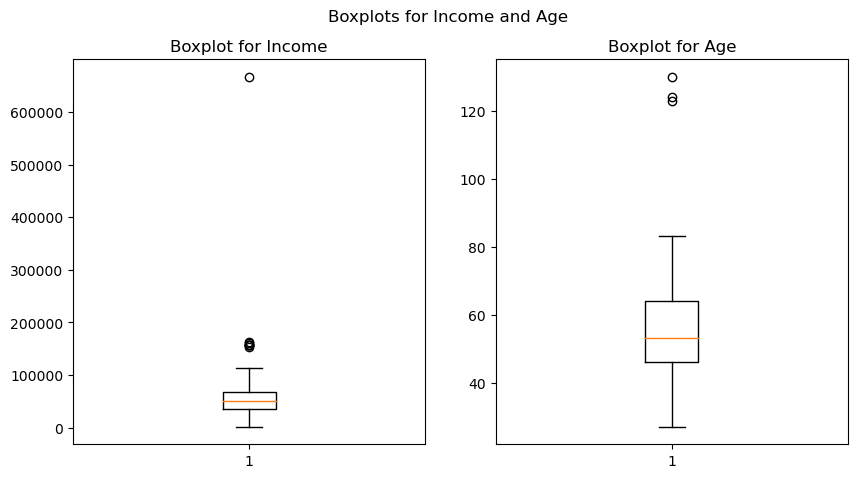

In [15]:
# Create boxplots for Income ang Age to identify outlier

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first boxplot on the left subplot
axs[0].boxplot(data['Income'])
axs[0].set_title('Boxplot for Income')

# Plot the second boxplot on the right subplot
axs[1].boxplot(data['Age'])
axs[1].set_title('Boxplot for Age')

# Add a main title for the whole figure
fig.suptitle('Boxplots for Income and Age')

# Show the plot
plt.show()

In [16]:
# Remove outlier in Income variable
data.drop(data[data['Income'] >= 160000].index,inplace=True)

In [17]:
# Remove outlier in Income variable
data.drop(data[data['Age'] >= 90].index,inplace=True)

In [18]:
# Save a csv file
data.to_csv("df.csv", index=False)
df = pd.read_csv('df.csv')
df.head()

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enrolled_Days
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,53,3249
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,62,3250
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,65,3283
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,56,3107
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,34,3200


In [19]:
# Summary statistics for each column
df.describe()

,Id,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enrolled_Days
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.00000,2210.000000,2210.000000,2210.00000,2210.000000,2210.000000
mean,5588.856109,51859.587783,0.441629,0.505882,49.040271,305.500452,26.345701,166.439819,37.674208,27.069231,43.962896,2.319910,4.091855,2.661991,5.81086,5.325792,0.150679,0.00905,54.095475,3587.878281
std,3246.667604,21282.599874,0.536984,0.544292,28.947537,337.400971,39.757777,222.185984,54.789805,41.102663,51.715702,1.905749,2.740666,2.878284,3.24919,2.422304,0.357816,0.09472,11.702608,232.434822
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,27.000000,3076.000000
25%,2826.750000,35208.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.00000,3.000000,0.000000,0.00000,46.000000,3416.000000
50%,5458.500000,51369.000000,0.000000,0.000000,49.000000,176.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.00000,6.000000,0.000000,0.00000,53.000000,3589.000000
75%,8419.500000,68445.750000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.00000,7.000000,0.000000,0.00000,64.000000,3762.000000
max,11191.000000,157733.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.00000,20.000000,1.000000,1.00000,83.000000,4139.000000


## Visualization

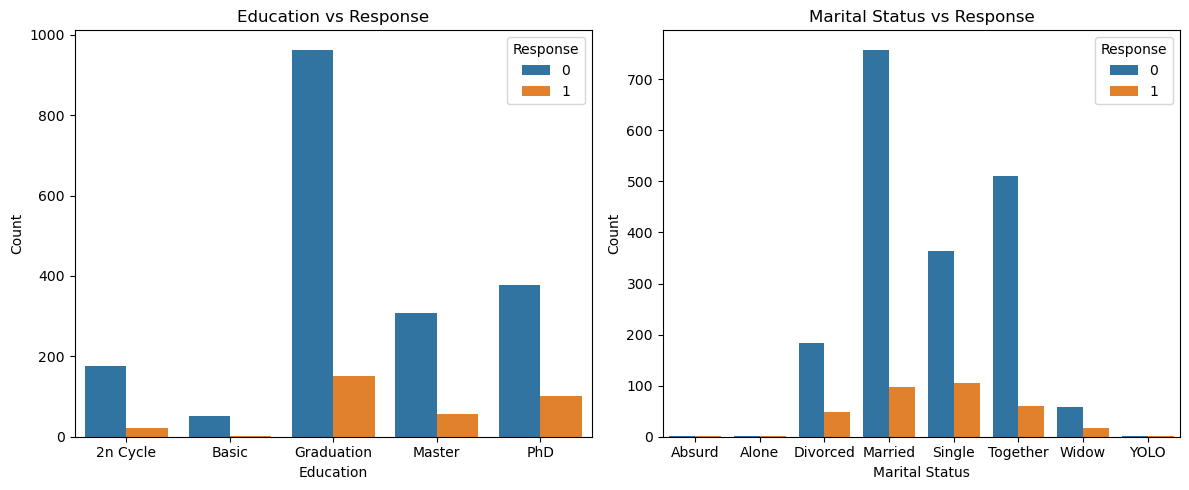

In [20]:
#  Create a barchart with two subplots

plt.figure(figsize=(12, 5))

# Group the data by Education and Response
edu_response = df.groupby(['Education', 'Response'])['Id'].count().reset_index()

# Create the bar chart for Education vs Response
plt.subplot(1, 2, 1)
sns.barplot(x='Education', y='Id', hue='Response', data=edu_response)
plt.title('Education vs Response')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')

# Group the data by Marital Status and Response
marital_response = df.groupby(['Marital_Status', 'Response'])['Id'].count().reset_index()

# Create the bar chart for Marital Status vs Response
plt.subplot(1, 2, 2)
sns.barplot(x='Marital_Status', y='Id', hue='Response', data=marital_response)
plt.title('Marital Status vs Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')

# Adjust the layout and display the chart
plt.tight_layout()
plt.show()

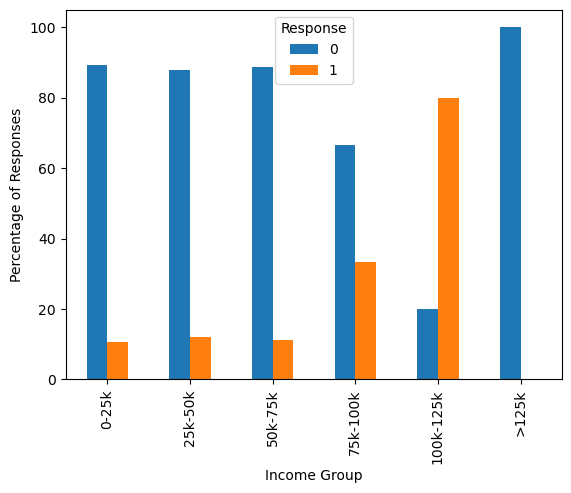

In [21]:
# Define income bins
income_bins = [0, 25000, 50000, 75000, 100000, 125000, df['Income'].max()]

# Create income groups
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '>125k']
df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Create bar plot
income_response = pd.crosstab(df['IncomeGroup'], df['Response'], normalize='index') * 100
income_response.plot(kind='bar', stacked=False)
plt.xlabel('Income Group')
plt.ylabel('Percentage of Responses')
plt.show()

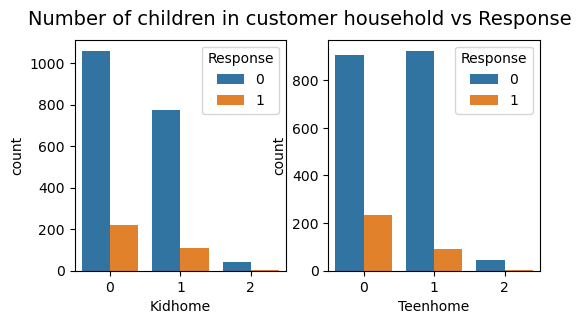

In [22]:
# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.countplot(x='Kidhome', hue='Response', data=df, ax=ax[0])
sns.countplot(x='Teenhome', hue='Response', data=df, ax=ax[1])
fig.suptitle('Number of children in customer household vs Response', fontsize=14)
plt.show()

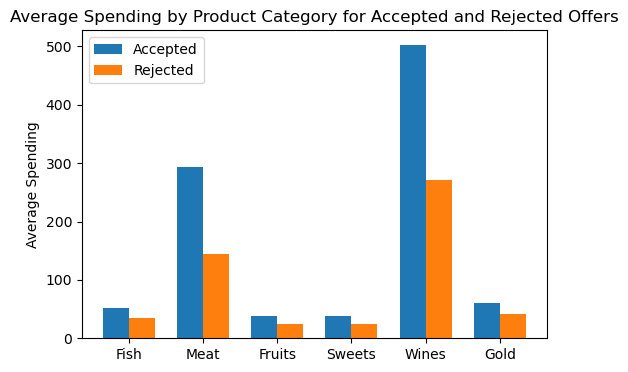

In [23]:
# Calculate average spending on each product category for customers who accepted and rejected the offer
mean_accepted = df[df['Response'] == 1][['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].mean()
mean_rejected = df[df['Response'] == 0][['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].mean()

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(6,4))
x_labels = ['Fish', 'Meat', 'Fruits', 'Sweets', 'Wines', 'Gold']
x = np.arange(len(x_labels))
width = 0.35

rects1 = ax.bar(x - width/2, mean_accepted, width, label='Accepted')
rects2 = ax.bar(x + width/2, mean_rejected, width, label='Rejected')

# Add labels and legend
ax.set_ylabel('Average Spending')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# Add plot title and show plot
plt.title('Average Spending by Product Category for Accepted and Rejected Offers')
plt.show()

/var/folders/7p/930fwsfn037ggfd5_dmg5k9w0000gn/T/ipykernel_6271/3186114140.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('Response').mean()


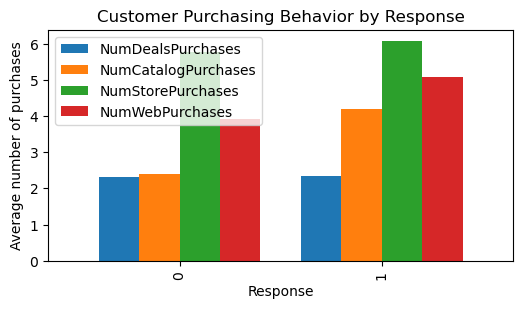

In [24]:
# Group data by response variable and calculate mean values
grouped = df.groupby('Response').mean()

# Extract relevant columns for plotting
categories = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
data = grouped[categories]

# Create a clustered bar chart
ax = data.plot(kind='bar', width=0.8, figsize=(6,3))
ax.legend(loc='best')

# Set axis labels and title
ax.set_xlabel('Response')
ax.set_ylabel('Average number of purchases')
ax.set_title('Customer Purchasing Behavior by Response')

# Show the plot
plt.show()

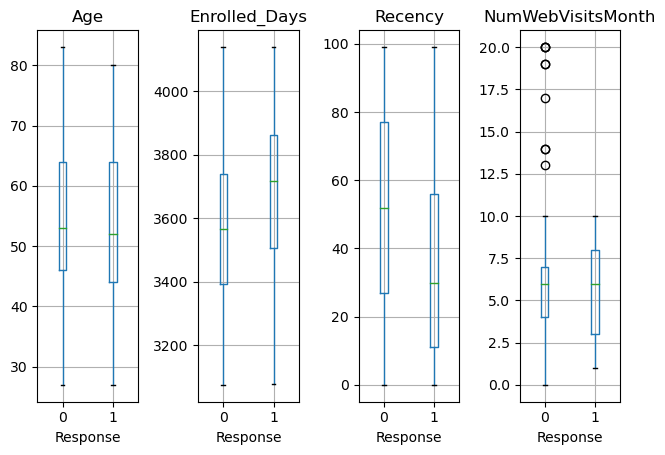

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4)
df.boxplot(column='Age', by='Response', ax=axes[0])
df.boxplot(column='Enrolled_Days', by='Response', ax=axes[1])
df.boxplot(column='Recency', by='Response', ax=axes[2])
df.boxplot(column='NumWebVisitsMonth', by='Response', ax=axes[3])
for ax in axes:
    ax.set_xlabel('Response')
plt.suptitle('')  
plt.tight_layout()  

plt.show()

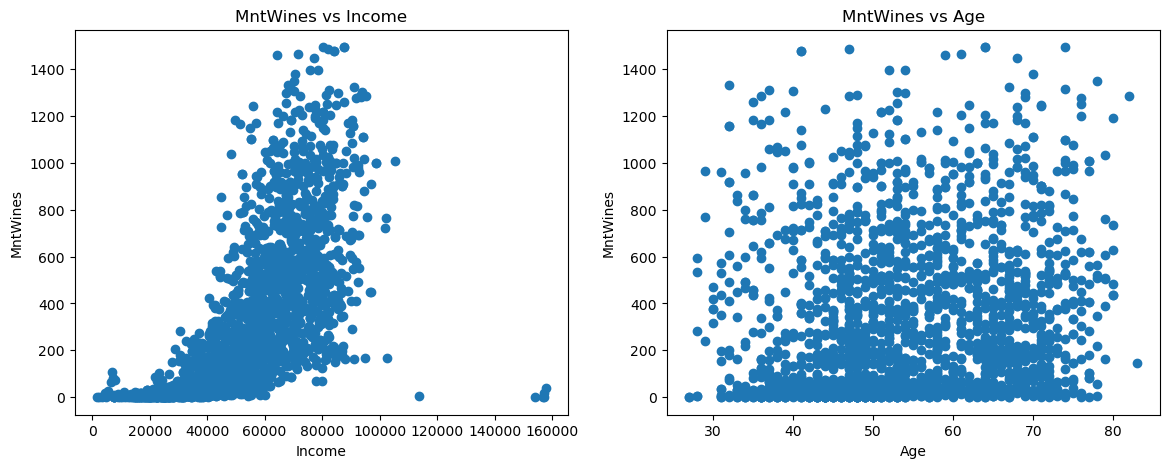

In [26]:
# Create a scatterplot with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot for Income and MntWines
axs[0].scatter(df['Income'], df['MntWines'])
axs[0].set_xlabel('Income')
axs[0].set_ylabel('MntWines')
axs[0].set_title('MntWines vs Income')

# Scatter plot for Age and MntWines
axs[1].scatter(df['Age'], df['MntWines'])
axs[1].set_xlabel('Age')
axs[1].set_ylabel('MntWines')
axs[1].set_title('MntWines vs Age')

# Show the plot
plt.show()

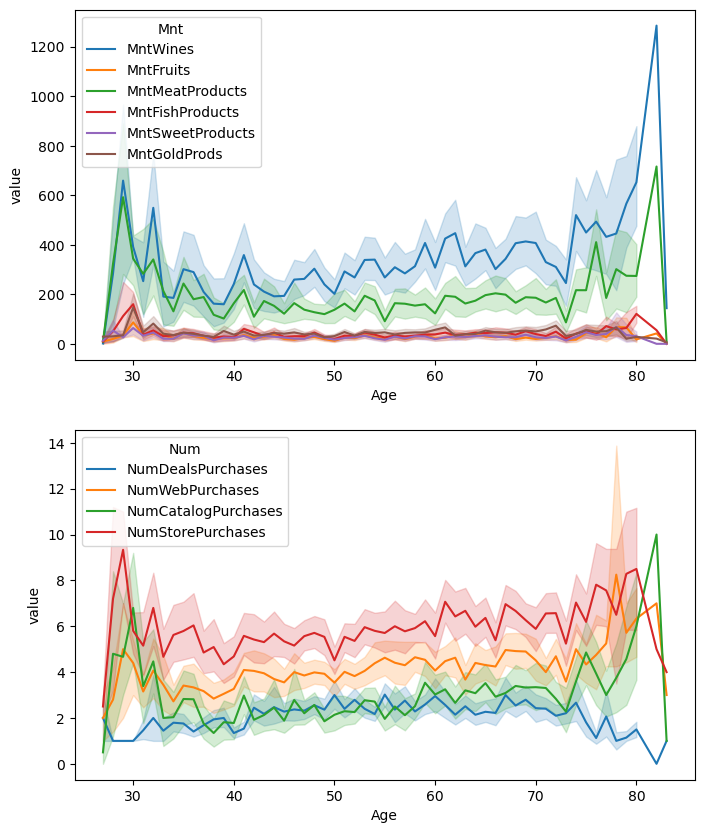

In [27]:
#  Create a line chart with two subplots

# select columns to plot
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# melt the data to create a long-form dataframe for plotting
mnt_data = pd.melt(df, id_vars=['Age'], value_vars=mnt_cols, var_name='Mnt')
num_data = pd.melt(df, id_vars=['Age'], value_vars=num_cols, var_name='Num')

# plot the data using seaborn
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
sns.lineplot(x='Age', y='value', hue='Mnt', data=mnt_data, ax=ax1)
sns.lineplot(x='Age', y='value', hue='Num', data=num_data, ax=ax2)
plt.show()

## Classification Tree

In [28]:
# Load the Superstore dataset
df=pd.read_csv('df.csv')
df

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enrolled_Days
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,53,3249
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,62,3250
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,65,3283
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,56,3107
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,34,3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,78,2,5,2,11,4,0,0,47,3597
2206,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,16,1,1,0,3,8,0,0,46,3759
2207,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,14,2,6,1,5,8,0,0,47,4075
2208,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,63,1,5,4,10,3,0,0,45,3813


In [29]:
# Drop ID columns
df = df.drop(columns=['Id'])
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age',
       'Enrolled_Days'],
      dtype='object')

In [30]:
# Separate X and y variables
predictors=['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age',
       'Enrolled_Days']
outcome='Response'

In [31]:
# Get dummy variables and partition data
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [32]:
# Develop classification tree with max_depth=10
classTree1 = DecisionTreeClassifier(random_state=0, max_depth=6)
classTree1.fit(train_X, train_y)
classificationSummary(valid_y, classTree1.predict(valid_X))

Confusion Matrix (Accuracy 0.8394)

       Prediction
Actual   0   1
     0 710  37
     1 105  32


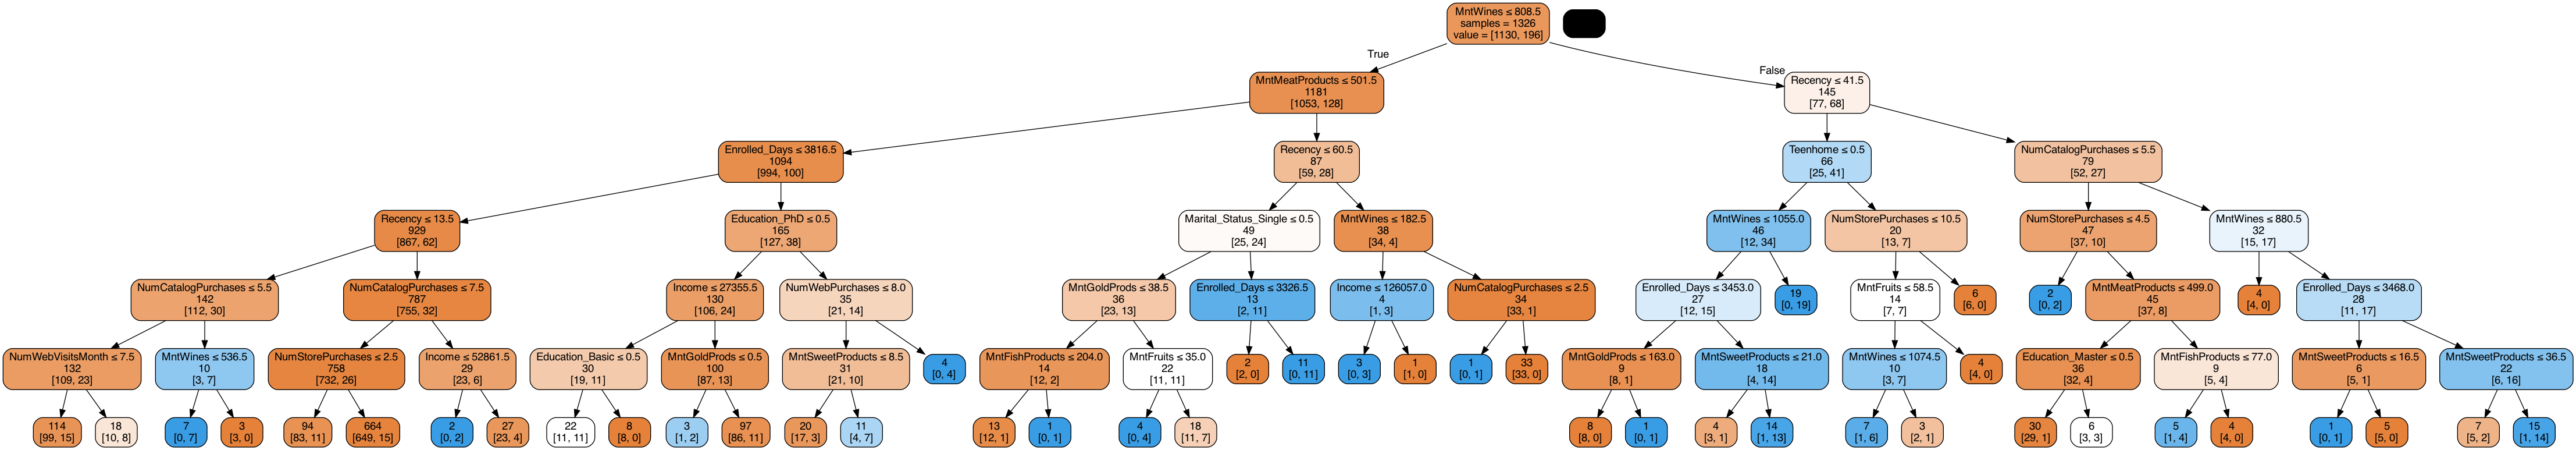

In [33]:
plotDecisionTree(classTree1, feature_names=train_X.columns)

In [34]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.805', '0.800', '0.785', '0.842', '0.789']
Accuracy: 0.804 (+/- 0.040)
Accuracy: 0.804 (+/- 0.020)


## Grid Search

In [35]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8499333238757272
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}


In [36]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.001, 0.005, 0.01, 0.05, 0.1], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.8559597105972478
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


In [37]:
# Confusion Matrix for BestClassTree
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8281)

       Prediction
Actual   0   1
     0 724  23
     1 129   8


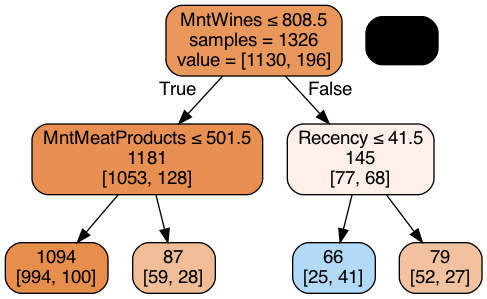

In [38]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

## Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                    feature  importance       std
4                  MntWines    0.110992  0.043462
3                   Recency    0.087615  0.027796
0                    Income    0.084070  0.036446
6           MntMeatProducts    0.079061  0.036254
17            Enrolled_Days    0.075154  0.025541
9              MntGoldProds    0.061528  0.024460
16                      Age    0.056988  0.024816
12      NumCatalogPurchases    0.053814  0.029509
13        NumStorePurchases    0.047873  0.020927
7           MntFishProducts    0.047210  0.022849
5                 MntFruits    0.045357  0.022778
8          MntSweetProducts    0.044947  0.022410
14        NumWebVisitsMonth    0.036695  0.017340
11          NumWebPurchases    0.036503  0.019164
10        NumDealsPurchases    0.029804  0.015387
21            Education_PhD    0.016626  0.011383
25    Marital_Status_Single    0.013769  0.011775
2                  Teenhome    0.013428  0.012057
24   Marital_Status_Married    0.010170  0.008781


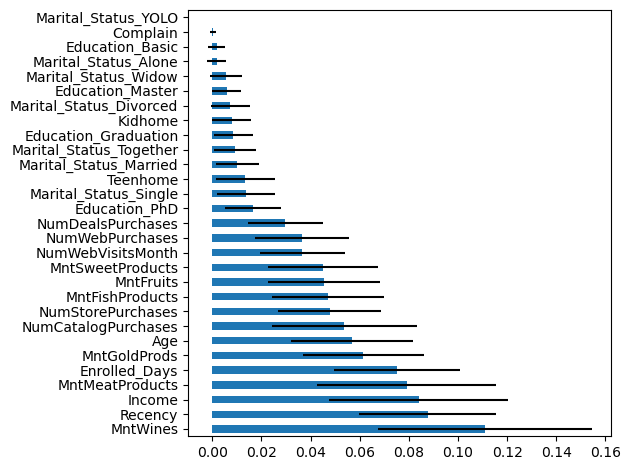

In [40]:
rf_importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': rf_importances, 'std': std})
df = df.sort_values('importance', ascending=False)
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [41]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.8609)

       Prediction
Actual   0   1
     0 733  14
     1 109  28


## Boosted Trees

In [42]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.8609)

       Prediction
Actual   0   1
     0 714  33
     1  90  47


                    feature  importance
4                  MntWines    0.195905
3                   Recency    0.131725
6           MntMeatProducts    0.094765
17            Enrolled_Days    0.078063
13        NumStorePurchases    0.073093
12      NumCatalogPurchases    0.071509
0                    Income    0.064775
9              MntGoldProds    0.045286
7           MntFishProducts    0.041608
14        NumWebVisitsMonth    0.030390
10        NumDealsPurchases    0.028812
16                      Age    0.024248
21            Education_PhD    0.023042
2                  Teenhome    0.018734
25    Marital_Status_Single    0.014907
8          MntSweetProducts    0.014053
5                 MntFruits    0.013311
11          NumWebPurchases    0.011170
23  Marital_Status_Divorced    0.006641
27     Marital_Status_Widow    0.004763
19     Education_Graduation    0.003352
26  Marital_Status_Together    0.002749
1                   Kidhome    0.002031
24   Marital_Status_Married    0.001903


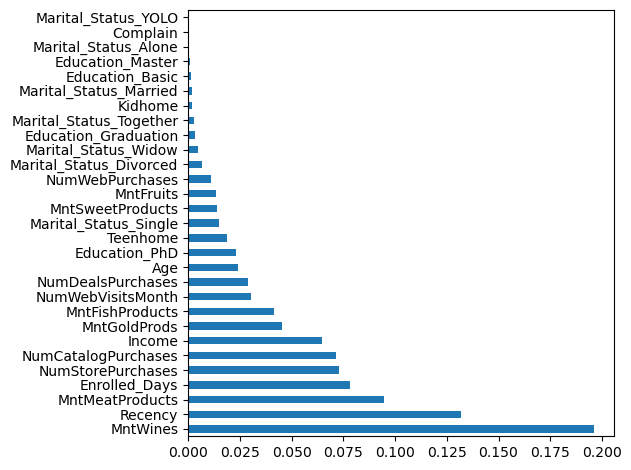

In [45]:
boost_importances = boost.feature_importances_

df = pd.DataFrame({'feature': train_X.columns, 'importance': boost_importances})
df = df.sort_values('importance',ascending=False)
print(df)

ax = df.plot(kind='barh', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [49]:
# Confusion Matrix
cm1 = [[710, 37], [105, 32]]
cmgrid = [[724, 23], [129, 8]]
cmrf = [[733, 14], [109, 28]]
cmboost = [[714, 33], [89, 48]]

# For conf_matrix
TP1 = cm1[1][1]
FN1 = cm1[1][0]
TN1 = cm1[0][0]
FP1 = cm1[0][1]


# For conf_matrix_grid
TPgrid = cmgrid[1][1]
FNgrid = cmgrid[1][0]
TNgrid = cmgrid[0][0]
FPgrid = cmgrid[0][1]

# For conf_matrix_rf
TPrf = cmrf[1][1]
FNrf = cmrf[1][0]
TNrf = cmrf[0][0]
FPrf = cmrf[0][1]

# For conf_matrix_boost
TPboost = cmboost[1][1]
FNboost = cmboost[1][0]
TNboost = cmboost[0][0]
FPboost = cmboost[0][1]

TP1_pct = (TP1 / (TP1 + FN1)) * 100
TPgrid_pct = (TPgrid / (TPgrid + FNgrid)) * 100
TPrf_pct = (TPrf / (TPrf + FNrf)) * 100
TPboost_pct = (TPboost / (TPboost + FNboost)) * 100

TN1_pct = (TN1 / (TN1 + FP1)) * 100
TNgrid_pct = (TNgrid / (TNgrid + FPgrid)) * 100
TNrf_pct = (TNrf / (TNrf + FPrf)) * 100
TNboost_pct = (TNboost / (TNboost + FPboost)) * 100

# Define the headers and data for the table
headers = headers = ['Confusion Matrix', 'Sensitivity (%)', 'Specificity (%)', 'Overall Accuracy (%)']
data = [    ['CM_6Branch', '{:.2f}%'.format(TP1_pct),'{:.2f}%'.format(TN1_pct), '{:.2f}%'.format((cm1[0][0] + cm1[1][1])/(cm1[0][0] + cm1[0][1] + cm1[1][0] + cm1[1][1]) * 100)],
    ['CM_Grid', '{:.2f}%'.format(TPgrid_pct), '{:.2f}%'.format(TNgrid_pct),'{:.2f}%'.format((cmgrid[0][0] + cmgrid[1][1])/(cmgrid[0][0] + cmgrid[0][1] + cmgrid[1][0] + cmgrid[1][1])* 100)],
    ['CM_RF', '{:.2f}%'.format(TPrf_pct),'{:.2f}%'.format(TNrf_pct), '{:.2f}%'.format((cmrf[0][0] + cmrf[1][1])/(cmrf[0][0] + cmrf[0][1] + cmrf[1][0] + cmrf[1][1]) * 100)],
    ['CM_Boost', '{:.2f}%'.format(TPboost_pct), '{:.2f}%'.format(TNboost_pct),'{:.2f}%'.format((cmboost[0][0] + cmboost[1][1] )/(cmboost[0][0] + cmboost[0][1] + cmboost[1][0] + cmboost[1][1])* 100)]
]

# Create the table and set the headers
table = PrettyTable()
table.field_names = headers

# Add the data to the table
for row in data:
    table.add_row(row)

# Print the table
print(table)

+------------------+-----------------+-----------------+----------------------+
| Confusion Matrix | Sensitivity (%) | Specificity (%) | Overall Accuracy (%) |
+------------------+-----------------+-----------------+----------------------+
|    CM_6Branch    |      23.36%     |      95.05%     |        83.94%        |
|     CM_Grid      |      5.84%      |      96.92%     |        82.81%        |
|      CM_RF       |      20.44%     |      98.13%     |        86.09%        |
|     CM_Boost     |      35.04%     |      95.58%     |        86.20%        |
+------------------+-----------------+-----------------+----------------------+


## Logit Regression

In [50]:
# Fit a logistic regression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

# Get intercepts, coefficients, and AIC
print('Intercept:', logit_reg.intercept_[0])
coefficients = pd.DataFrame({'Coefficients': logit_reg.coef_[0]}, index=X.columns)
coefficients_sorted = coefficients.sort_values(by='Coefficients', ascending=False)
print(coefficients_sorted.to_string())
print('AIC:', AIC_score(valid_y, logit_reg.predict(valid_X), df=len(train_X.columns) + 1))

Intercept: -0.005698845023362142
                         Coefficients
NumCatalogPurchases          0.075743
NumWebVisitsMonth            0.067851
NumWebPurchases              0.035844
Education_PhD                0.034540
Marital_Status_Single        0.028159
Marital_Status_Widow         0.009098
Marital_Status_Divorced      0.005821
MntSweetProducts             0.004395
MntGoldProds                 0.002659
MntWines                     0.002449
MntMeatProducts              0.001789
Kidhome                      0.001287
Marital_Status_Alone         0.001020
MntFishProducts              0.000800
Complain                     0.000188
Marital_Status_YOLO          0.000000
Income                      -0.000015
Enrolled_Days               -0.000027
MntFruits                   -0.001797
Education_Basic             -0.004955
Education_Master            -0.006612
NumDealsPurchases           -0.013264
Education_Graduation        -0.018598
Marital_Status_Together     -0.018810
Age              

In [51]:
# Use the classification summary function for validation data
logit_reg_pred = logit_reg.predict(valid_X)
classificationSummary(valid_y, logit_reg_pred)

Confusion Matrix (Accuracy 0.8394)

       Prediction
Actual   0   1
     0 719  28
     1 114  23


In [52]:
# Confusion Matrix
cmlogit = [[719, 28], [114, 23]]


# For conf_matrix1
TPlogit = cmlogit[1][1]
FNlogit = cmlogit[1][0]
TNlogit = cmlogit[0][0]
FPlogit = cmlogit[0][1]

TPlogit_pct = (TPlogit / (TPlogit + FNlogit)) * 100
TNlogit_pct = (TNlogit / (TNlogit + FPlogit)) * 100

# Define the headers and data for the table
headers = ['Confusion Matrix', 'Sensitivity (%)','Specificity (%)','Total Accuracy (%)']
data = [    ['CM_Logit', '{:.2f}%'.format(TPlogit_pct), '{:.2f}%'.format(TNlogit_pct),'{:.2f}%'.format((cmlogit[0][0] + cmlogit[1][1])/(cmlogit[0][0] + cmlogit[0][1] + cmlogit[1][0] + cmlogit[1][1]) * 100)]
    
]

# Create the table and set the headers
table = PrettyTable()
table.field_names = headers

# Add the data to the table
for row in data:
    table.add_row(row)

# Print the table
print(table)

+------------------+-----------------+-----------------+--------------------+
| Confusion Matrix | Sensitivity (%) | Specificity (%) | Total Accuracy (%) |
+------------------+-----------------+-----------------+--------------------+
|     CM_Logit     |      16.79%     |      96.25%     |       83.94%       |
+------------------+-----------------+-----------------+--------------------+


In [53]:
# Backward elimination
def train_model(variables):
    model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
    model.fit(train_X, train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X), model)

bestBE_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Complain, Age, Enrolled_Days, Education_Basic, Education_Graduation, Education_Master, Education_PhD, Marital_Status_Alone, Marital_Status_Divorced, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow, Marital_Status_YOLO
Start: score=1060.77
Step: score=1060.77, remove None
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Enrolled_Days', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Sta

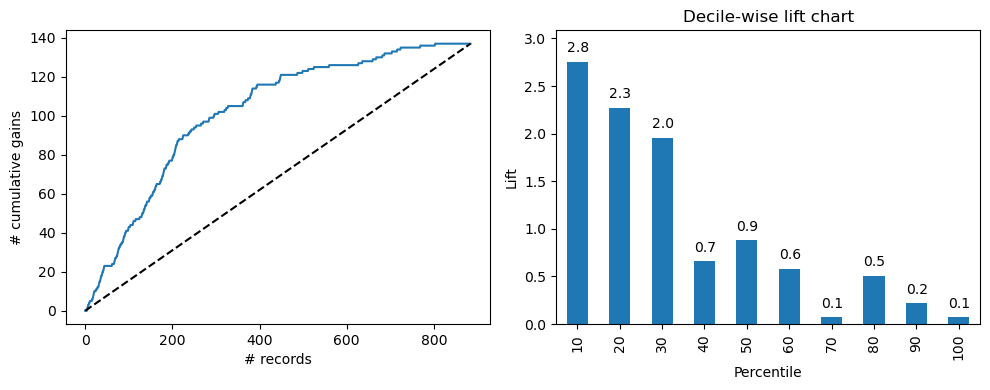

In [54]:
logit_reg_predBE = bestBE_model.predict(valid_X[best_variables])
logit_reg_proba = bestBE_model.predict_proba(valid_X[best_variables])
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_predBE })

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

## Clustering

In [55]:
# Load the Superstore dataset
df=pd.read_csv('df.csv')
df

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enrolled_Days
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,53,3249
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,62,3250
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,65,3283
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,56,3107
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,34,3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,78,2,5,2,11,4,0,0,47,3597
2206,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,16,1,1,0,3,8,0,0,46,3759
2207,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,14,2,6,1,5,8,0,0,47,4075
2208,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,63,1,5,4,10,3,0,0,45,3813


In [56]:
# Drop Education and Marital_Status columns
df = df.drop(columns=['Id','Education','Marital_Status', 'Complain'])
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Age', 'Enrolled_Days'],
      dtype='object')

In [57]:
# Move the 'Response' column to the end of the dataframe
new_order = list(df.columns.drop('Response')) + ['Response']
df = df.reindex(columns=new_order)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Enrolled_Days,Response
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,53,3249,1
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,62,3250,1
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,65,3283,0
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,56,3107,0
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,34,3200,1


In [58]:
# Normalize the data columns except for Awards column
df_norm = np.round((df.iloc[:,0:17] - df.iloc[:,0:17].mean()) / df.iloc[:,0:17].std(),decimals=3)
df_norm['Response'] = df['Response']                                     
df_norm.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Enrolled_Days,Response
0,1.549,-0.822,-0.929,-1.694,-0.345,1.953,0.957,1.338,3.940,3.365,-0.693,-0.034,0.465,0.058,-1.786,-0.094,-1.458,1
1,0.246,-0.822,-0.929,-1.694,0.470,-0.537,-0.461,-0.560,-0.659,-0.135,-0.693,1.061,0.117,0.366,-0.134,0.675,-1.454,1
2,0.724,-0.822,0.908,-1.694,-0.508,-0.386,-0.484,-0.414,-0.610,-0.270,-0.693,-0.398,-0.230,-0.250,-1.373,0.932,-1.312,0
3,-0.911,1.040,0.908,-1.694,-0.876,-0.663,-0.745,-0.688,-0.659,-0.850,-0.693,-1.128,-0.925,-1.173,0.691,0.163,-2.069,0
4,-1.428,1.040,-0.929,-1.694,-0.888,-0.260,-0.641,-0.487,-0.659,-0.193,-0.168,-0.398,-0.577,-1.173,0.691,-1.717,-1.669,1


In [59]:
# calculate distance 
d_norm = np.round(pairwise.pairwise_distances(df_norm, metric="euclidean"),decimals=2)
pd.DataFrame(d_norm, columns=df_norm.index, index=df_norm.index).head(5)

,0,1,2,3,4,5,6,7,8,9,...,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209
0,0.00,7.23,7.18,8.84,8.31,5.93,6.81,8.07,7.41,7.41,...,9.12,9.12,8.87,8.87,7.74,7.13,9.34,9.47,6.07,8.87
1,7.23,0.00,3.14,4.60,4.46,6.08,3.77,3.53,2.88,2.88,...,5.31,5.31,5.20,5.20,4.88,5.05,5.95,5.87,7.44,8.16
2,7.18,3.14,0.00,3.76,5.03,6.08,5.52,2.13,2.57,2.57,...,5.46,5.46,4.31,4.31,4.84,4.88,6.01,6.43,7.61,7.80
3,8.84,4.60,3.76,0.00,3.15,7.78,7.13,2.54,4.51,4.51,...,4.54,4.54,4.10,4.10,6.36,6.39,4.91,6.23,8.97,9.17
4,8.31,4.46,5.03,3.15,0.00,7.52,6.77,3.88,5.61,5.61,...,4.43,4.43,4.94,4.94,6.45,6.48,4.60,5.69,8.49,9.31


In [60]:
# Clustering model - average 
Zavg = linkage(df_norm.iloc[:,0:17], method='average') #excluding Awards categorical column
memb = fcluster(Zavg, 5, criterion='maxclust') #no more than 5 clusters

Means of Normalized Input Variables for Clusters with Average Linkage Method
   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
1  -1.027    0.621    -0.913    0.002    -0.782     -0.476           -0.612   
2  -0.396    0.491     0.898   -0.083    -0.617     -0.554           -0.611   
3   0.385   -0.457     0.881    0.204     0.838     -0.114           -0.060   
4   0.710   -0.607     0.256   -0.333     0.474      1.232            0.450   
5   1.220   -0.770    -0.890    0.084     0.871      0.875            1.483   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1           -0.487            -0.481        -0.451             -0.219   
2           -0.573            -0.554        -0.534              0.118   
3           -0.161            -0.110         0.440              0.874   
4            1.021             1.094         0.653             -0.057   
5            1.066             0.948         0.588             -0.649   

   NumWeb

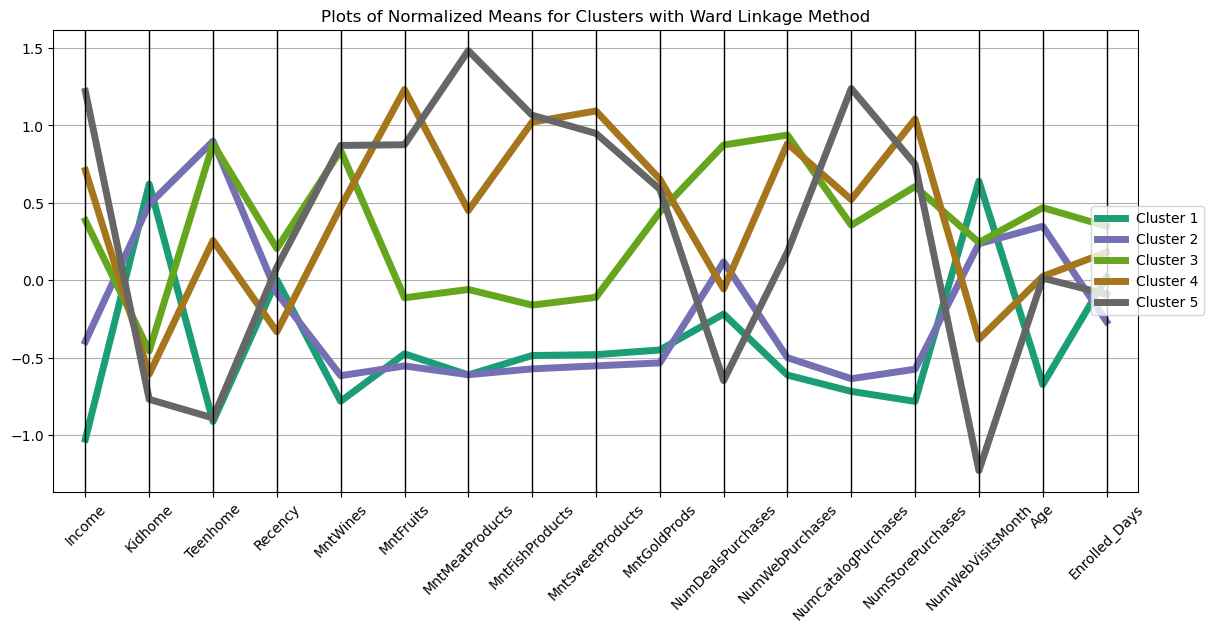

In [66]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_mean_norm = df_norm.iloc[:,0:17].groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Means of Normalized Input Variables for Clusters with Average Linkage Method')
print(clust_mean_norm)
    
for cluster, data in df.groupby(memb):
    count = len(data)
    Tot_Response = sum(data['Response'])
    print(f'Cluster {cluster} ({count} members) with total responses {Tot_Response}')  

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(14,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,16.5)
plt.xticks(rotation=45)
plt.title('Plots of Normalized Means for Clusters with Ward Linkage Method')
plt.show()

In [67]:
# Clustering model - ward
Zward = linkage(df_norm.iloc[:,0:17], method='ward') #excluding Awards categorical column
memb = fcluster(Zward, 5, criterion='maxclust') #no more than 5 clusters

Means of Normalized Input Variables for Clusters with Ward Linkage Method
   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
1  -1.027    0.621    -0.913    0.002    -0.782     -0.476           -0.612   
2  -0.396    0.491     0.898   -0.083    -0.617     -0.554           -0.611   
3   0.385   -0.457     0.881    0.204     0.838     -0.114           -0.060   
4   0.710   -0.607     0.256   -0.333     0.474      1.232            0.450   
5   1.220   -0.770    -0.890    0.084     0.871      0.875            1.483   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1           -0.487            -0.481        -0.451             -0.219   
2           -0.573            -0.554        -0.534              0.118   
3           -0.161            -0.110         0.440              0.874   
4            1.021             1.094         0.653             -0.057   
5            1.066             0.948         0.588             -0.649   

   NumWebPur

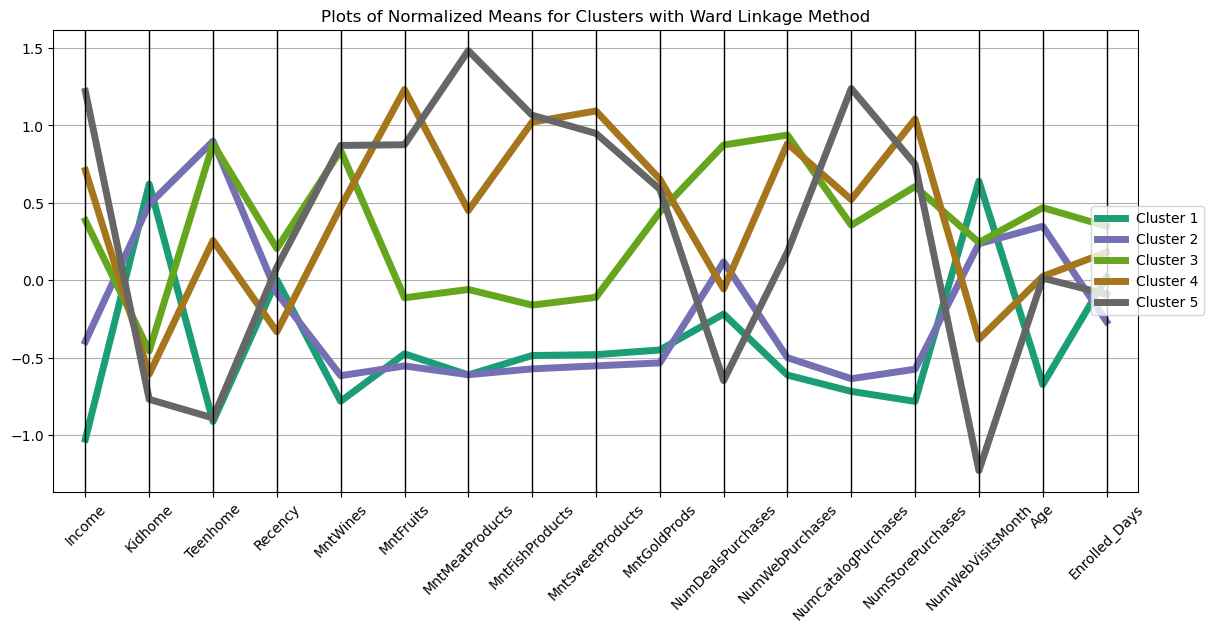

In [68]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_mean_norm = df_norm.iloc[:,0:17].groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Means of Normalized Input Variables for Clusters with Ward Linkage Method')
print(clust_mean_norm)

for cluster, data in df.groupby(memb):
    count = len(data)
    Tot_Response = sum(data['Response'])
    print(f'Cluster {cluster} ({count} members) with total responses {Tot_Response}')  

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(14,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,16.5)
plt.xticks(rotation=45)
plt.title('Plots of Normalized Means for Clusters with Ward Linkage Method')
plt.show()


In [69]:
# Kmeans 
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_norm)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_norm.columns)

# Add 'Cluster number' column
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)
print(centroids)

for cluster, data in df.groupby(kmeans.labels_):
    count = len(data)
    Tot_Response = sum(data['Response'])
    print(f'Cluster {cluster} ({count} members) with total responses {Tot_Response}')

   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  -0.166    0.780     0.680   -0.020    -0.069     -0.353           -0.271   
1   0.485   -0.698     0.656   -0.015     0.764      0.028           -0.019   
2   1.160   -0.754    -0.677    0.023     0.843      1.152            1.386   
3  -1.070    0.790    -0.891   -0.028    -0.821     -0.513           -0.643   
4  -0.475    0.318     0.797    0.029    -0.730     -0.556           -0.649   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0           -0.348            -0.316         0.165              2.184   
1           -0.016             0.023         0.393              0.211   
2            1.219             1.135         0.666             -0.570   
3           -0.522            -0.510        -0.527             -0.295   
4           -0.577            -0.550        -0.589             -0.145   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0    

/Users/sofiapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
